In [25]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("white")
sns.set_context("poster")

from PIL import Image
import os
from resizeimage import resizeimage

In [48]:
# get current directory and image directory
main_dir = os.getcwd()
pic_dir =  os.getcwd() + '\\img_orginal_source'
process_dir = os.getcwd() + '\\img_orginal_source\\300'

In [3]:
# change directory to image folder
os.chdir(pic_dir)

In [4]:
# check what is current directory
os.getcwd()

'D:\\web developer\\individual project\\pixiv project\\img_orginal_source'

In [9]:
os.listdir('.')

['300',
 '52261027_p0.png',
 '53403181_p0.png',
 '53473150_p0.jpg',
 '53788580_p0.jpg',
 '54224782_p0.jpg',
 '55026631_p0.jpg',
 '55084234_p0.jpg',
 '55133139_p0.jpg',
 '55133314_p0.png',
 '55133339_p0.png']

In [ ]:
# Loop the image in current directory
for f in os.listdir('.'):
    if f.endswith('.png'):
        pic = Image.open(f)
        fn, fext = os.path.splitext(f)
        print(fn, fext)
        pic.save('{}{}'.format(fn, '.jpg'))
        os.remove('{}{}'.format(fn, '.png'))
        
        width, height = pic.size
        print(width, height)
        fn, fext = os.path.splitext(f)
        if (height < width):
            pic = resizeimage.resize_height(pic, 300)

        else:
            pic = resizeimage.resize_width(pic, 300)
        width, height = pic.size
        print(width, height)
        
        pic = resizeimage.resize_crop(pic, [300, 300])

        width, height = pic.size
        print(width, height)
        
        pic.save('300/{}_300{}'.format(fn, '.jpg'))
    if f.endswith('.jpg'):
        pic = Image.open(f)
        width, height = pic.size
        print(width, height)
        fn, fext = os.path.splitext(f)
        if (height < width):
            pic = resizeimage.resize_height(pic, 300)

        else:
            pic = resizeimage.resize_width(pic, 300)
        width, height = pic.size
        print(width, height)
        
        pic = resizeimage.resize_crop(pic, [300, 300])

        width, height = pic.size
        print(width, height)
        
        pic.save('300/{}_300{}'.format(fn, '.jpg'))


In [102]:
# Example of open one image and resize it into optimal size for analysis
# open image and get its size and height
pic = Image.open('53403181_p0.png')
width, height = pic.size
print(width, height)

# first convert the smallest value (either width or height) into 300px
if (height < width):
    pic = resizeimage.resize_height(pic, 300)
#    pic.save('300/{}_300{}'.format('52261027_p0', '.png'))
else:
    pic = resizeimage.resize_width(pic, 300)
#    pic.save('300/{}_300{}'.format('52261027_p0', '.png'))

# Get the width, height and print them to check
width, height = pic.size
print(width, height)

# Crop the image from the centre to get 300*300 pixels images
pic = resizeimage.resize_crop(pic, [300, 300])

width, height = pic.size
print(width, height)

# Save image in the '300' folder
pic.save('300/{}_300{}'.format('52261027_p0', '.jpg'))


1053 795
398 300
300 300


In [19]:
pic = cv2.imread('52261027_p0.jpg', 1)

In [17]:
cv2.imshow('image',pic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)

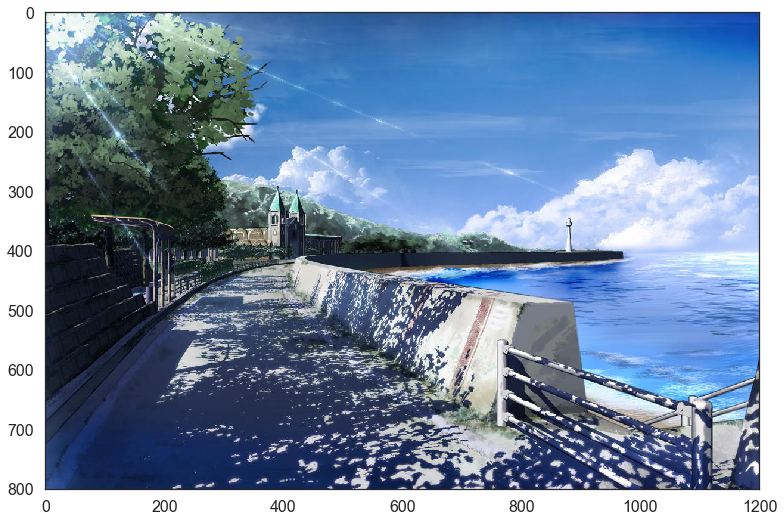

In [26]:
plt.imshow(pic)

In [27]:
pic.shape

(800, 1200, 3)

In [36]:
pic[0].shape

(1200, 3)

In [80]:
type(np.array(pic.reshape(1,-1).shape))

numpy.ndarray

In [53]:
os.chdir(process_dir)

In [56]:
size = 300*300*3

In [88]:
img_data = np.zeros((1, size))

In [61]:
img_data.shape

(1, 270000)

In [73]:
new_arr =  np.zeros((1, size))

In [76]:
np.append(new_arr, img_data, axis = 0).shape

(2, 270000)

In [ ]:
for f in os.listdir('.'):
    pic = cv2.imread(f, 1)
    pic = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
    pic = np.array(pic.reshape(1,-1))
    img_data = np.append(img_data, pic, axis = 0)

In [98]:
img_data = img_data[1:]

In [43]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=2)
X = pca.fit_transform(img_data)

In [109]:
print(pca.explained_variance_ratio_.sum())

0.599885269828


In [111]:
pca.explained_variance_ratio_.shape[0]

2

In [113]:
df = pd.DataFrame()

In [115]:
for i in range(pca.explained_variance_ratio_.shape[0]):
    df['pc%d' %(i)] = X[:,i]

In [121]:
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
df['y'] = y

In [124]:
df.dtypes

pc0    float64
pc1    float64
y        int64
dtype: object

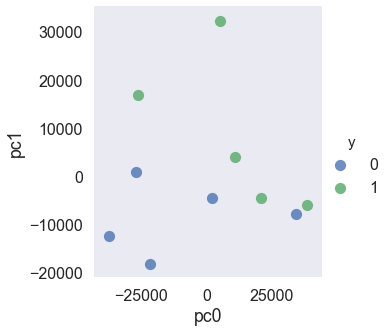

In [126]:
with sns.axes_style('dark'):
    sns.lmplot('pc0', 'pc1', df, fit_reg=False, hue='y')